Database 1: Samples
===================

After fitting a large suite of strong lens data, we can use the aggregator to load the results and manipulate,
interpret and visualize them using a Python script or Jupyter notebook.

This script uses the results generated by the script `/autolens_workspace/aggregator/phase_runner.py`, which fitted 3
simulated strong lenses with:

 - An `EllipticalIsothermal` `MassProfile`.for the lens galaxy's mass.
 - An `EllipticalSersic` `LightProfile`.for the source galaxy's light.

This fit was performed using one `PhaseImaging` object, and the first four tutorials (a1-a4) cover how to use the
aggregator on the results of `Phase`'s (as opposed to `Pipeline`'s). However, the aggregator API is extremely similar
across both and learning to use the aggregator with phases can be easily applied to the results of pipelines.

__Samples__

If you are familiar with the `Samples` object returned from a *PyAutoLens* model-fit (e.g. via a `Phase` or `Pipeline`)
You will be familiar with most of the content in this script. Nevertheless, the script also describes how to use
the `Aggregator`, so will be useful for you too!

__File Output__

The results of this fit are in the `autolens_workspace/output/aggregator` folder. First, take a look in this folder.
Provided you haven't rerun the runner, you`ll notice that all the results (e.g. samples, samples_backup,
model.results, images, etc.) are in .zip files as opposed to folders that can be instantly accessed.

This is because when the pipeline was run, the `remove_files` option in the `config/general.ini` was set to True.
This means all results (other than the .zip file) were removed. This feature is implemented because super-computers
often have a limit on the number of files allowed per user.

Bare in mind the fact that all results are in .zip files, we'll come back to this point in a second.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autofit as af

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


To set up the aggregator we simply pass it the folder of the results we want to load.

In [2]:
agg = af.Aggregator(directory=path.join("output", "database", "phase_runner"))

Aggregator loading phases... could take some time.

 A total of 3 phases and results were found.


Before we continue, take another look at the output folder. The .zip files containing results have now all been 
unzipped, such that the results are accessible on your laptop for navigation. This means you can run fits to many 
lenses on a super computer and easily unzip all the results on your computer afterwards via the aggregator.

To begin, let me quickly explain what a generator is in Python, for those unaware. A generator is an object that 
iterates over a function when it is called. The aggregator creates all objects as generators, rather than lists, or 
dictionaries, or whatever.

Why? Because lists store every entry in memory simultaneously. If you fit many lenses, you`ll have lots of results and 
therefore use a lot of memory. This will crash your laptop! On the other hand, a generator only stores the object in 
memory when it runs the function; it is free to overwrite it afterwards. Thus, your laptop won't crash!

There are two things to bare in mind with generators:

    1) A generator has no length, thus to determine how many entries of data it corresponds to you first must convert 
       it to a list.
    
    2) Once we use a generator, we cannot use it again and we'll need to remake it.

We can now create a `samples` generator of every fit, which creates `Sample`'s objects of our results. This object 
contains information on the result of the non-linear search.

In [3]:
samples_gen = agg.values("samples")

When we print this the length of this generator converted to a list of outputs we see 3 different NestSamples 
instances. These correspond to each fit of each phase to each of our 3 images.

In [4]:
print("NestedSampler Samples: \n")
print(samples_gen)
print()
print("Total Samples Objects = ", len(list(samples_gen)), "\n")

NestedSampler Samples: 


Total Samples Objects =  3 



The `Samples` class contains all the parameter samples, which is a list of lists where:
 
 - The outer list is the size of the total number of samples.
 - The inner list is the size of the number of free parameters in the fit.

In [5]:
for samples in agg.values("samples"):

    print("All parameters of the very first sample")
    print(samples.parameters[0])
    print("The third parameter of the tenth sample")
    print(samples.parameters[9][2])

print("Samples: \n")
print(agg.values("samples"))
print()
print("Total Samples Objects = ", len(list(agg.values("samples"))), "\n")

All parameters of the very first sample
[-0.031892005695805074, 0.20302257843551982, 0.8146473305405608, 0.4357315121033225, 2.985318933255427, 0.26718550497485116, -0.016444095370040553, -0.5665616258928807, -0.6339713841744492, 282743.89691560826, 20.0644159337641, 4.8301588131279685]
The third parameter of the tenth sample
0.46694282627876205
All parameters of the very first sample
[-0.08133349067381801, -0.06066758111986558, -0.39105864269560264, -0.005638633771561041, 0.8149604444990638, 0.41051992743636617, 0.22791751996270207, -0.2135188368225982, 0.2671081663893353, 17435.93817113045, 16.176018291074225, 5.637272658598519]
The third parameter of the tenth sample
0.7730259270979645
All parameters of the very first sample
[0.20559697228495005, -0.09486194334489, -0.5609320745665742, 0.43773419066572083, 1.7459483256196346, 0.34605997958943574, -0.22391474332185618, -0.8021069335373721, -0.15474804799094555, 780698.2136600062, 13.255513507444741, 3.7875636458285475]
The third para

The `Samples` class contains the log likelihood, log prior, log posterior and weights of every sample, where:

   - The log likelihood is the value evaluated from the likelihood function (e.g. -0.5 * chi_squared + the noise 
     normalization).
    
   - The log prior encodes information on how the priors on the parameters maps the log likelihood value to the log
     posterior value.
      
   - The log posterior is log_likelihood + log_prior.
    
   - The weight gives information on how samples should be combined to estimate the posterior. The weight values 
     depend on the sampler used, for example for MCMC they will all be 1`s.

In [6]:
for samples in agg.values("samples"):
    print("log(likelihood), log(prior), log(posterior) and weight of the tenth sample.")
    print(samples.log_likelihoods[9])
    print(samples.log_priors[9])
    print(samples.log_posteriors[9])
    print(samples.weights[9])

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-6906882155710.905
2.67466258262702
-6906882155708.23
0.0
log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-174007425721.69748
1.3198668785235346
-174007425720.37762
0.0
log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-10414275.117150243
25.67590895764399
-10414249.441241285
0.0


We can use the outputs to create a list of the maximum log likelihood model of each fit to our three images.

In [7]:
ml_vector = [samps.max_log_likelihood_vector for samps in agg.values("samples")]

print("Max Log Likelihood Model Parameter Lists: \n")
print(ml_vector, "\n\n")

Max Log Likelihood Model Parameter Lists: 

[[0.0006923806759218419, -0.0010592908144882909, 0.0002740640806262462, 0.2507789765418482, 0.7992038577783636, 0.1024501414859928, 0.10087760929036083, 0.002735587998274003, 0.24764755303579, 0.30862822573280235, 0.9757816895271278, 1.9878180346667451], [-0.002874163623906748, -0.0011940748815703645, 0.2521023488157401, 0.000545134416458648, 0.9999103262860324, 0.19971989990340783, 0.20115558100209308, -0.0023264935181558366, 0.1508627831810765, 0.3075677604478851, 1.4736964645355095, 2.4865284517878226], [0.00037963694421292517, -0.0005653771492624437, 0.24898629320719046, -0.0006526838205755947, 1.2003380445526965, 0.3004149622749043, 0.30028906808004474, 0.0013592043555050726, 0.22287043456009936, 0.29970032076923747, 1.9921791018687303, 3.0085058956364867]] 




This provides us with lists of all model parameters. However, this isn't that much use, which values correspond to 
which parameters?

The list of parameter names are available as a property of the `Model` included with the `Samples`, as are labels 
which can be used for labeling figures.

In [8]:
for samples in agg.values("samples"):
    model = samples.model
    print(model)
    print(model.parameter_names)
    print(model.parameter_labels)

Galaxy (centre_0, GaussianPrior, mean = 0.0, sigma = 0.1), (centre_1, GaussianPrior, mean = 0.0, sigma = 0.1), (elliptical_comps_0, UniformPrior, lower_limit = -1.0, upper_limit = 1.0), (elliptical_comps_1, UniformPrior, lower_limit = -1.0, upper_limit = 1.0), (einstein_radius, UniformPrior, lower_limit = 0.0, upper_limit = 3.0), Galaxy (centre_0, GaussianPrior, mean = 0.0, sigma = 0.3), (centre_1, GaussianPrior, mean = 0.0, sigma = 0.3), (elliptical_comps_0, UniformPrior, lower_limit = -1.0, upper_limit = 1.0), (elliptical_comps_1, UniformPrior, lower_limit = -1.0, upper_limit = 1.0), (intensity, LogUniformPrior, lower_limit = 1e-06, upper_limit = 1000000.0), (effective_radius, LogUniformPrior, lower_limit = 0.0001, upper_limit = 30.0), (sersic_index, UniformPrior, lower_limit = 0.5, upper_limit = 8.0), None, None
['centre_0', 'centre_1', 'elliptical_comps_0', 'elliptical_comps_1', 'einstein_radius', 'centre_0', 'centre_1', 'elliptical_comps_0', 'elliptical_comps_1', 'intensity', 'eff

These lists will be used later for visualization, how it is often more useful to create the model instance of every fit.

In [9]:
ml_instances = [samps.max_log_likelihood_instance for samps in agg.values("samples")]
print("Maximum Log Likelihood Model Instances: \n")
print(ml_instances, "\n")

Maximum Log Likelihood Model Instances: 

[<autofit.mapper.model.ModelInstance object at 0x7f1cdcbe1940>, <autofit.mapper.model.ModelInstance object at 0x7f1cdcbe1c40>, <autofit.mapper.model.ModelInstance object at 0x7f1cdcbe1bb0>] 



A model instance contains all the model components of our fit, most importantly the list of galaxies we specified in 
the pipeline.

In [10]:
print(ml_instances[0].galaxies)
print(ml_instances[1].galaxies)
print(ml_instances[2].galaxies)

These galaxies will be named according to the phase (in this case, `lens` and `source`).

In [11]:
print(ml_instances[0].galaxies.lens)
print()
print(ml_instances[1].galaxies.source)

Redshift: 0.5
Mass Profiles:
EllipticalIsothermal
centre: (0.0006923806759218419, -0.0010592908144882909)
elliptical_comps: (0.0002740640806262462, 0.2507789765418482)
axis_ratio: 0.5990033395587903
phi: 0.03130786539841208
einstein_radius: 0.7992038577783636
slope: 2.0
core_radius: 0.0
id: 27
_assertions: []
cls: <class 'autogalaxy.profiles.mass_profiles.total_mass_profiles.EllipticalIsothermal'>

Redshift: 1.0
Light Profiles:
EllipticalSersic
centre: (0.19971989990340783, 0.20115558100209308)
elliptical_comps: (-0.0023264935181558366, 0.1508627831810765)
axis_ratio: 0.7377995510603924
phi: -0.4417514100275739
intensity: 0.3075677604478851
effective_radius: 1.4736964645355095
sersic_index: 2.4865284517878226
id: 99624
_assertions: []
cls: <class 'autogalaxy.profiles.light_profiles.EllipticalSersic'>


Their `LightProfile`'s and `MassProfile`'s are also named according to the phase.

In [12]:
print(ml_instances[0].galaxies.lens.mass)
print(ml_instances[1].galaxies.source.bulge)

EllipticalIsothermal
centre: (0.0006923806759218419, -0.0010592908144882909)
elliptical_comps: (0.0002740640806262462, 0.2507789765418482)
axis_ratio: 0.5990033395587903
phi: 0.03130786539841208
einstein_radius: 0.7992038577783636
slope: 2.0
core_radius: 0.0
id: 27
_assertions: []
cls: <class 'autogalaxy.profiles.mass_profiles.total_mass_profiles.EllipticalIsothermal'>
EllipticalSersic
centre: (0.19971989990340783, 0.20115558100209308)
elliptical_comps: (-0.0023264935181558366, 0.1508627831810765)
axis_ratio: 0.7377995510603924
phi: -0.4417514100275739
intensity: 0.3075677604478851
effective_radius: 1.4736964645355095
sersic_index: 2.4865284517878226
id: 99624
_assertions: []
cls: <class 'autogalaxy.profiles.light_profiles.EllipticalSersic'>


We can also access the `median pdf` model, which is the model computed by marginalizing over the samples of every 
parameter in 1D and taking the median of this PDF.

In [13]:
mp_vector = [samps.median_pdf_vector for samps in agg.values("samples")]
mp_instances = [samps.median_pdf_instance for samps in agg.values("samples")]

print("Median PDF Model Parameter Lists: \n")
print(mp_vector, "\n")
print("Most probable Model Instances: \n")
print(mp_instances, "\n")
print(mp_instances[0].galaxies.lens.mass)
print()

Median PDF Model Parameter Lists: 

[[0.00032418604799837276, -0.0004561448243158224, -0.0002270304695373877, 0.25097055945448316, 0.799284511640935, 0.10213431733219408, 0.10157599186440809, 0.0032233099797351478, 0.2484723522591373, 0.30891100239914965, 0.9754611319086354, 1.9885488417179236], [-0.0027489730741878313, -0.0009737859006094594, 0.25220055711652656, 0.0007127530334713113, 0.9998792621273354, 0.19967514859882982, 0.20142986327245, -0.0014618003293222113, 0.15162074598037337, 0.30760834804080556, 1.4738356652335463, 2.485655693008718], [0.00029089625398927835, -0.0008212557767531926, 0.24868084914257435, -0.0005080107027741727, 1.2004313404911355, 0.3001431746003121, 0.3000512301045073, 0.00046533387940495176, 0.22320395585715042, 0.2992735188578344, 1.993381413454886, 3.0110054464713865]] 

Most probable Model Instances: 

[<autofit.mapper.model.ModelInstance object at 0x7f1cbe5a0b20>, <autofit.mapper.model.ModelInstance object at 0x7f1cbeb8abb0>, <autofit.mapper.model.Mo

We can compute the model parameters at a given sigma value (e.g. at 3.0 sigma limits).

These parameter values do not account for covariance between the model. For example if two parameters are degenerate 
this will find their values from the degeneracy in the `same direction` (e.g. both will be positive). we'll cover
how to handle covariance in a later tutorial.

Here, I use "uv3" to signify this is an upper value at 3 sigma confidence,, and "lv3" for the lower value.

In [14]:
uv3_vectors = [
    samps.vector_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

uv3_instances = [
    samps.instance_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

lv3_vectors = [
    samps.vector_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

lv3_instances = [
    samps.instance_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

print("Errors Lists: \n")
print(uv3_vectors, "\n")
print(lv3_vectors, "\n")
print("Errors Instances: \n")
print(uv3_instances, "\n")
print(lv3_instances, "\n")

Errors Lists: 

[[0.0033470203758112133, 0.0042461061757447386, 0.003985407093994826, 0.25678674979785177, 0.8009338659743184, 0.10426037534925203, 0.10414806923152442, 0.008403532149228682, 0.2531481688610507, 0.3180771481839945, 0.9897075273477421, 2.0136362357836233], [-0.00019281381760834275, 0.0019226731242193546, 0.2548023626504908, 0.003166544386328639, 1.0014325509529358, 0.20163717755477856, 0.20350156284667828, 0.0027411224008909024, 0.15516391992131529, 0.320047539450956, 1.5075956508398436, 2.5184439090952653], [0.0020225664307920816, 0.0016731249433155468, 0.2506313480708167, 0.0018919323199392958, 1.2018312327036131, 0.30140516498154557, 0.30163445874265554, 0.0038250928810156914, 0.22612031593281595, 0.3085160689235956, 2.0337042870189532, 3.0436571046076257]] 

[[-0.0024610073113401137, -0.0037114188747488903, -0.004678521895484946, 0.24578272095516604, 0.7979978456630329, 0.10027194566431806, 0.09907674025963974, -0.0017615953971675817, 0.24373957393062137, 0.301774066

We can compute the upper and lower errors on each parameter at a given sigma limit.

Here, "ue3" signifies the upper error at 3 sigma. 

In [15]:
ue3_vectors = [
    samps.error_vector_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

ue3_instances = [
    samps.error_instance_at_upper_sigma(sigma=3.0) for samps in agg.values("samples")
]

le3_vectors = [
    samps.error_vector_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]
le3_instances = [
    samps.error_instance_at_lower_sigma(sigma=3.0) for samps in agg.values("samples")
]

print("Errors Lists: \n")
print(ue3_vectors, "\n")
print(le3_vectors, "\n")
print("Errors Instances: \n")
print(ue3_instances, "\n")
print(le3_instances, "\n")

Errors Lists: 

[[0.0030228343278128405, 0.004702251000060561, 0.004212437563532213, 0.00581619034336861, 0.0016493543333834237, 0.0021260580170579524, 0.0025720773671163294, 0.005180222169493534, 0.0046758166019133796, 0.00916614578484487, 0.014246395439106774, 0.02508739406569971], [0.0025561592565794887, 0.002896459024828814, 0.0026018055339642188, 0.002453791352857328, 0.0015532888256004629, 0.0019620289559487414, 0.002071699574228286, 0.0042029227302131135, 0.0035431739409419183, 0.01243919141015043, 0.03375998560629734, 0.03278821608654736], [0.0017316701768028033, 0.0024943807200687395, 0.0019504989282423668, 0.0023999430227134686, 0.0013998922124776048, 0.0012619903812334798, 0.0015832286381482485, 0.0033597590016107397, 0.002916360075665536, 0.009242550065761246, 0.040322873564067274, 0.03265165813623927]] 

[[0.0027851933593384865, 0.0032552740504330677, 0.004451491425947559, 0.005187838499317116, 0.0012866659779020573, 0.00186237166787602, 0.0024992516047683544, 0.0049849053

The maximum log likelihood of each model fit and its Bayesian log evidence (estimated via the nested sampling 
algorithm) are also available.

Given each fit is to a different image, these are not very useful. However, in a later tutorial we'll look at using 
the aggregator for images that we fit with many different models and many different pipelines, in which case comparing 
the evidences allows us to perform Bayesian model comparison!

In [16]:
print("Maximum Log Likelihoods and Log Evidences: \n")
print([max(samps.log_likelihoods) for samps in agg.values("samples")])
print([samps.log_evidence for samps in agg.values("samples")])

Maximum Log Likelihoods and Log Evidences: 

[5395.561985507383, 4513.7219248336505, 3774.1369705040265]
[5343.361156409952, 4456.6660716783135, 3718.261812653519]


We can also print the "model_results" of all phases, which is string that summarizes every fit`s lens model providing 
quick inspection of all results.

In [17]:
results = agg.model_results
print("Model Results Summary: \n")
print(results, "\n")

Model Results Summary: 



Bayesian Evidence                                                                         5343.36115641
Maximum Likelihood                                                                        5395.56198551

Maximum Log Likelihood Model:

galaxies
    lens
        mass
            centre
                centre_0                                                                  0.001
                centre_1                                                                  -0.001
            elliptical_comps
                elliptical_comps_0                                                        0.000
                elliptical_comps_1                                                        0.251
            einstein_radius                                                               0.799
    source
        bulge
            centre
                centre_0                                                                  0.102
                centre_1         

The Probability Density Functions (PDF's) of the results can be plotted using the library:

 corner.py: https://corner.readthedocs.io/en/latest/

(In built visualization for PDF's and non-linear searches is a future feature of PyAutoFit, but for now you`ll have to 
use the libraries yourself!).

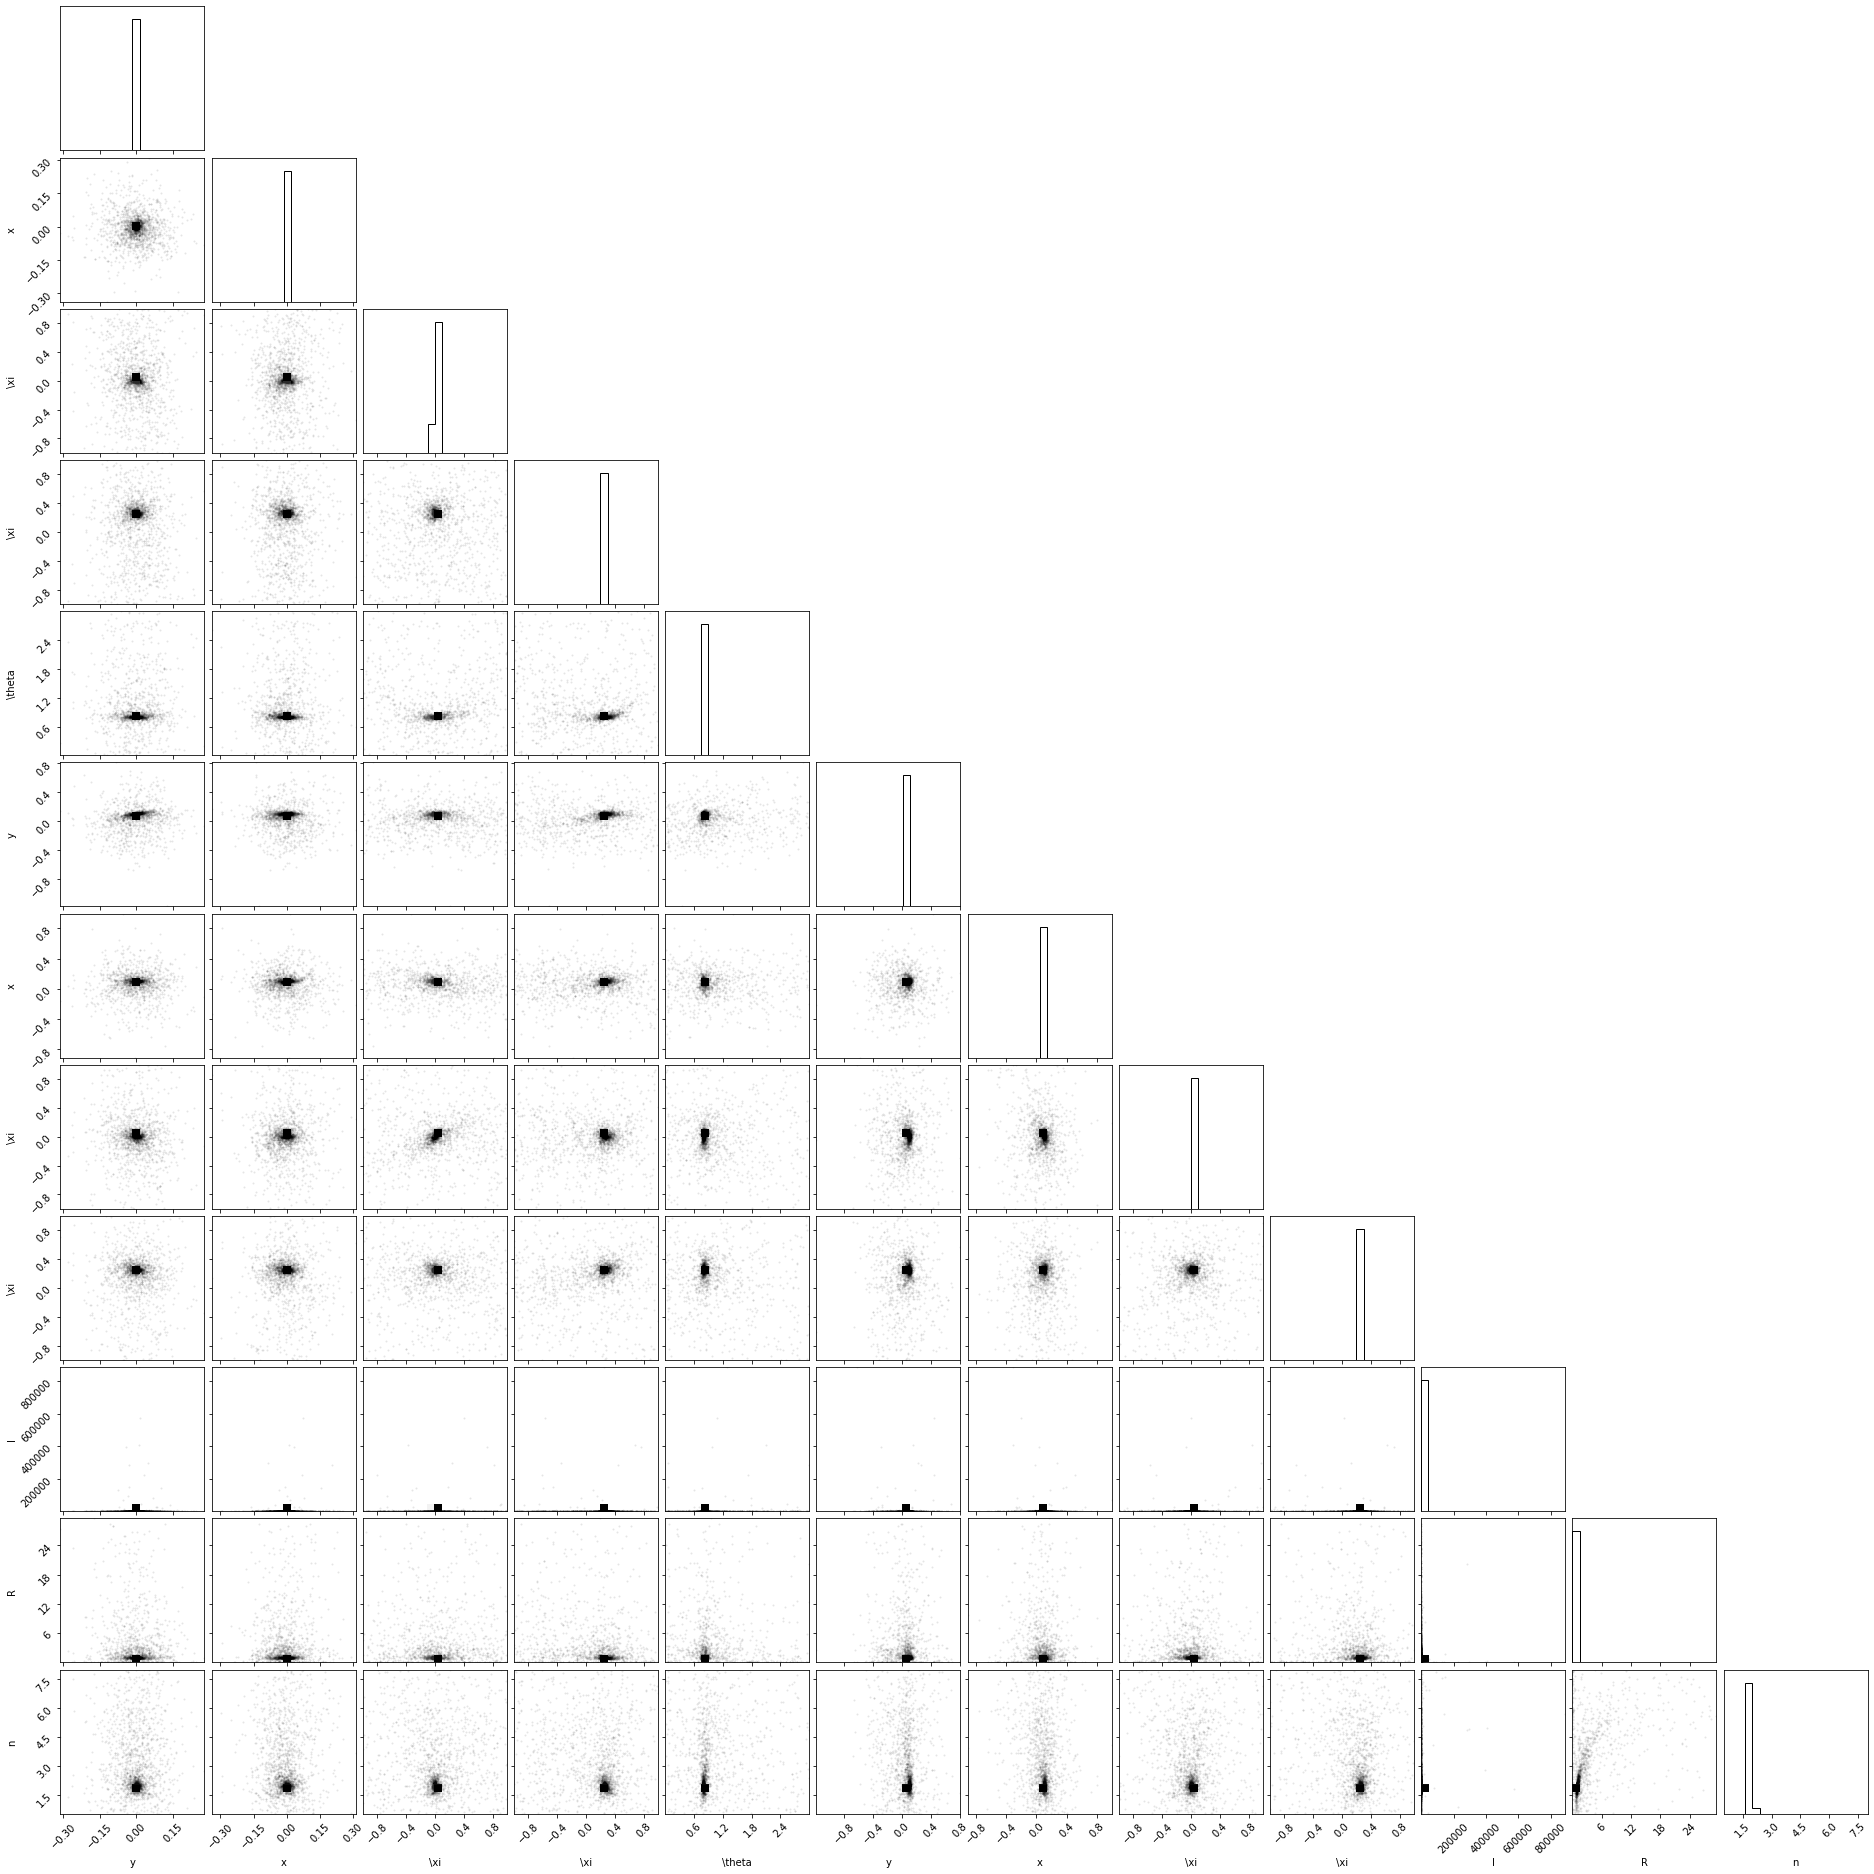

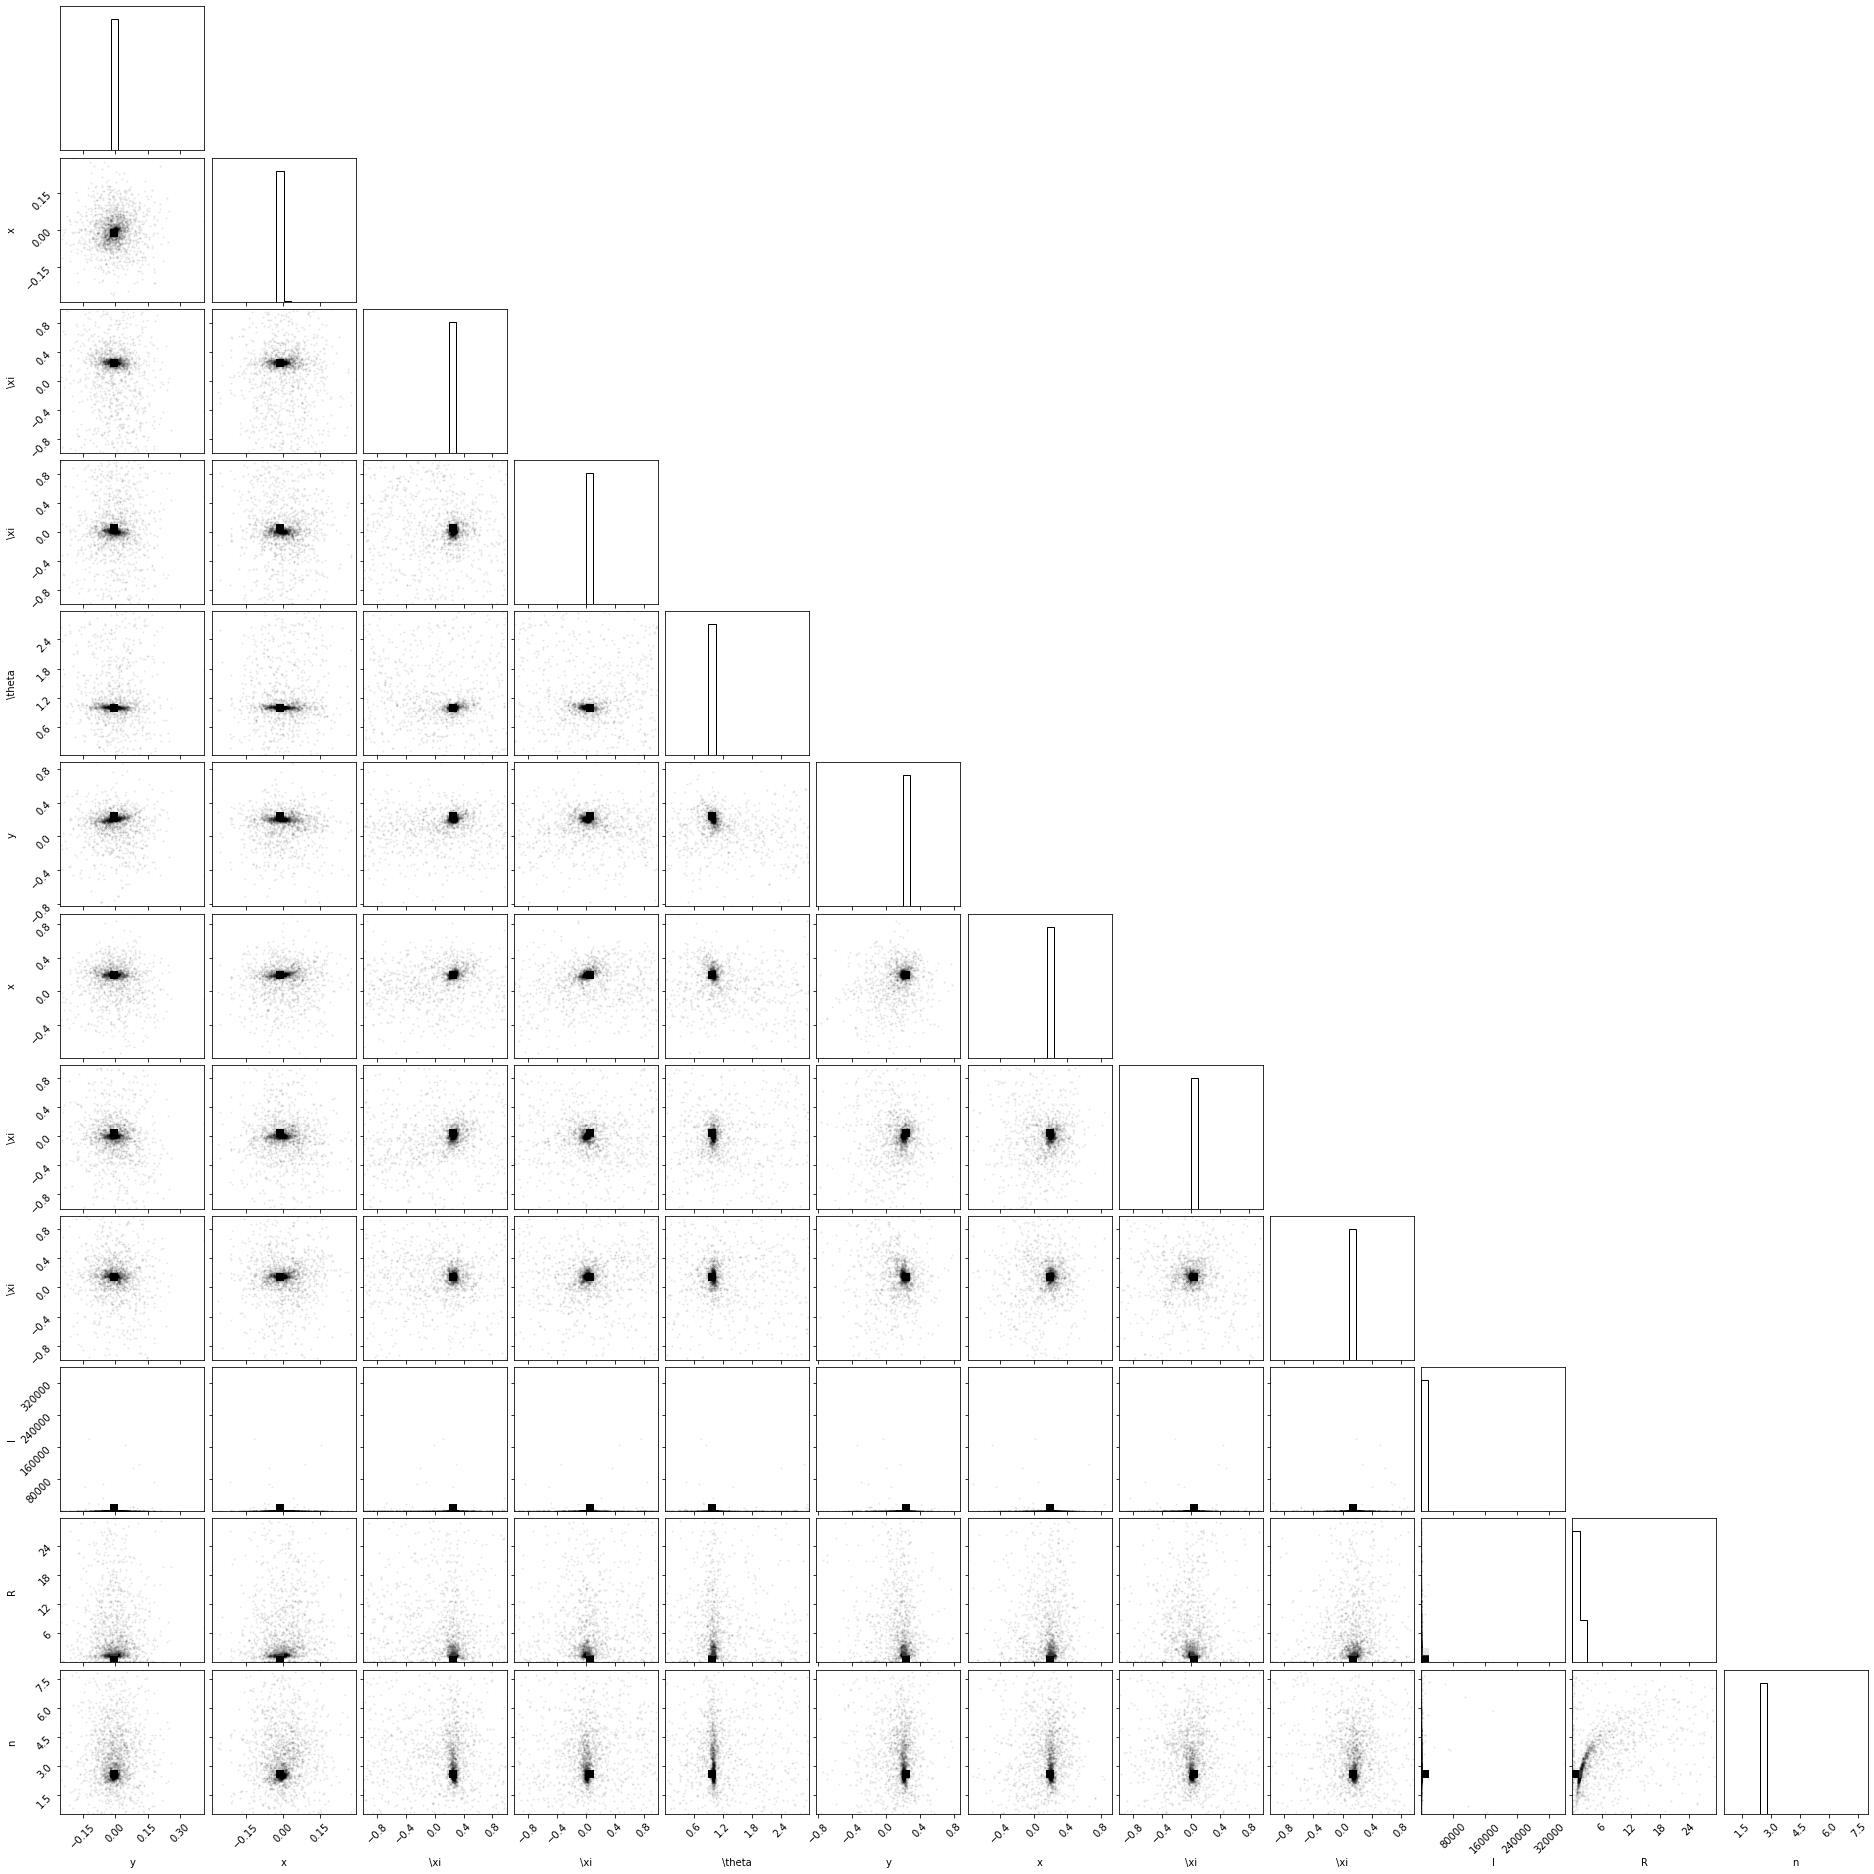

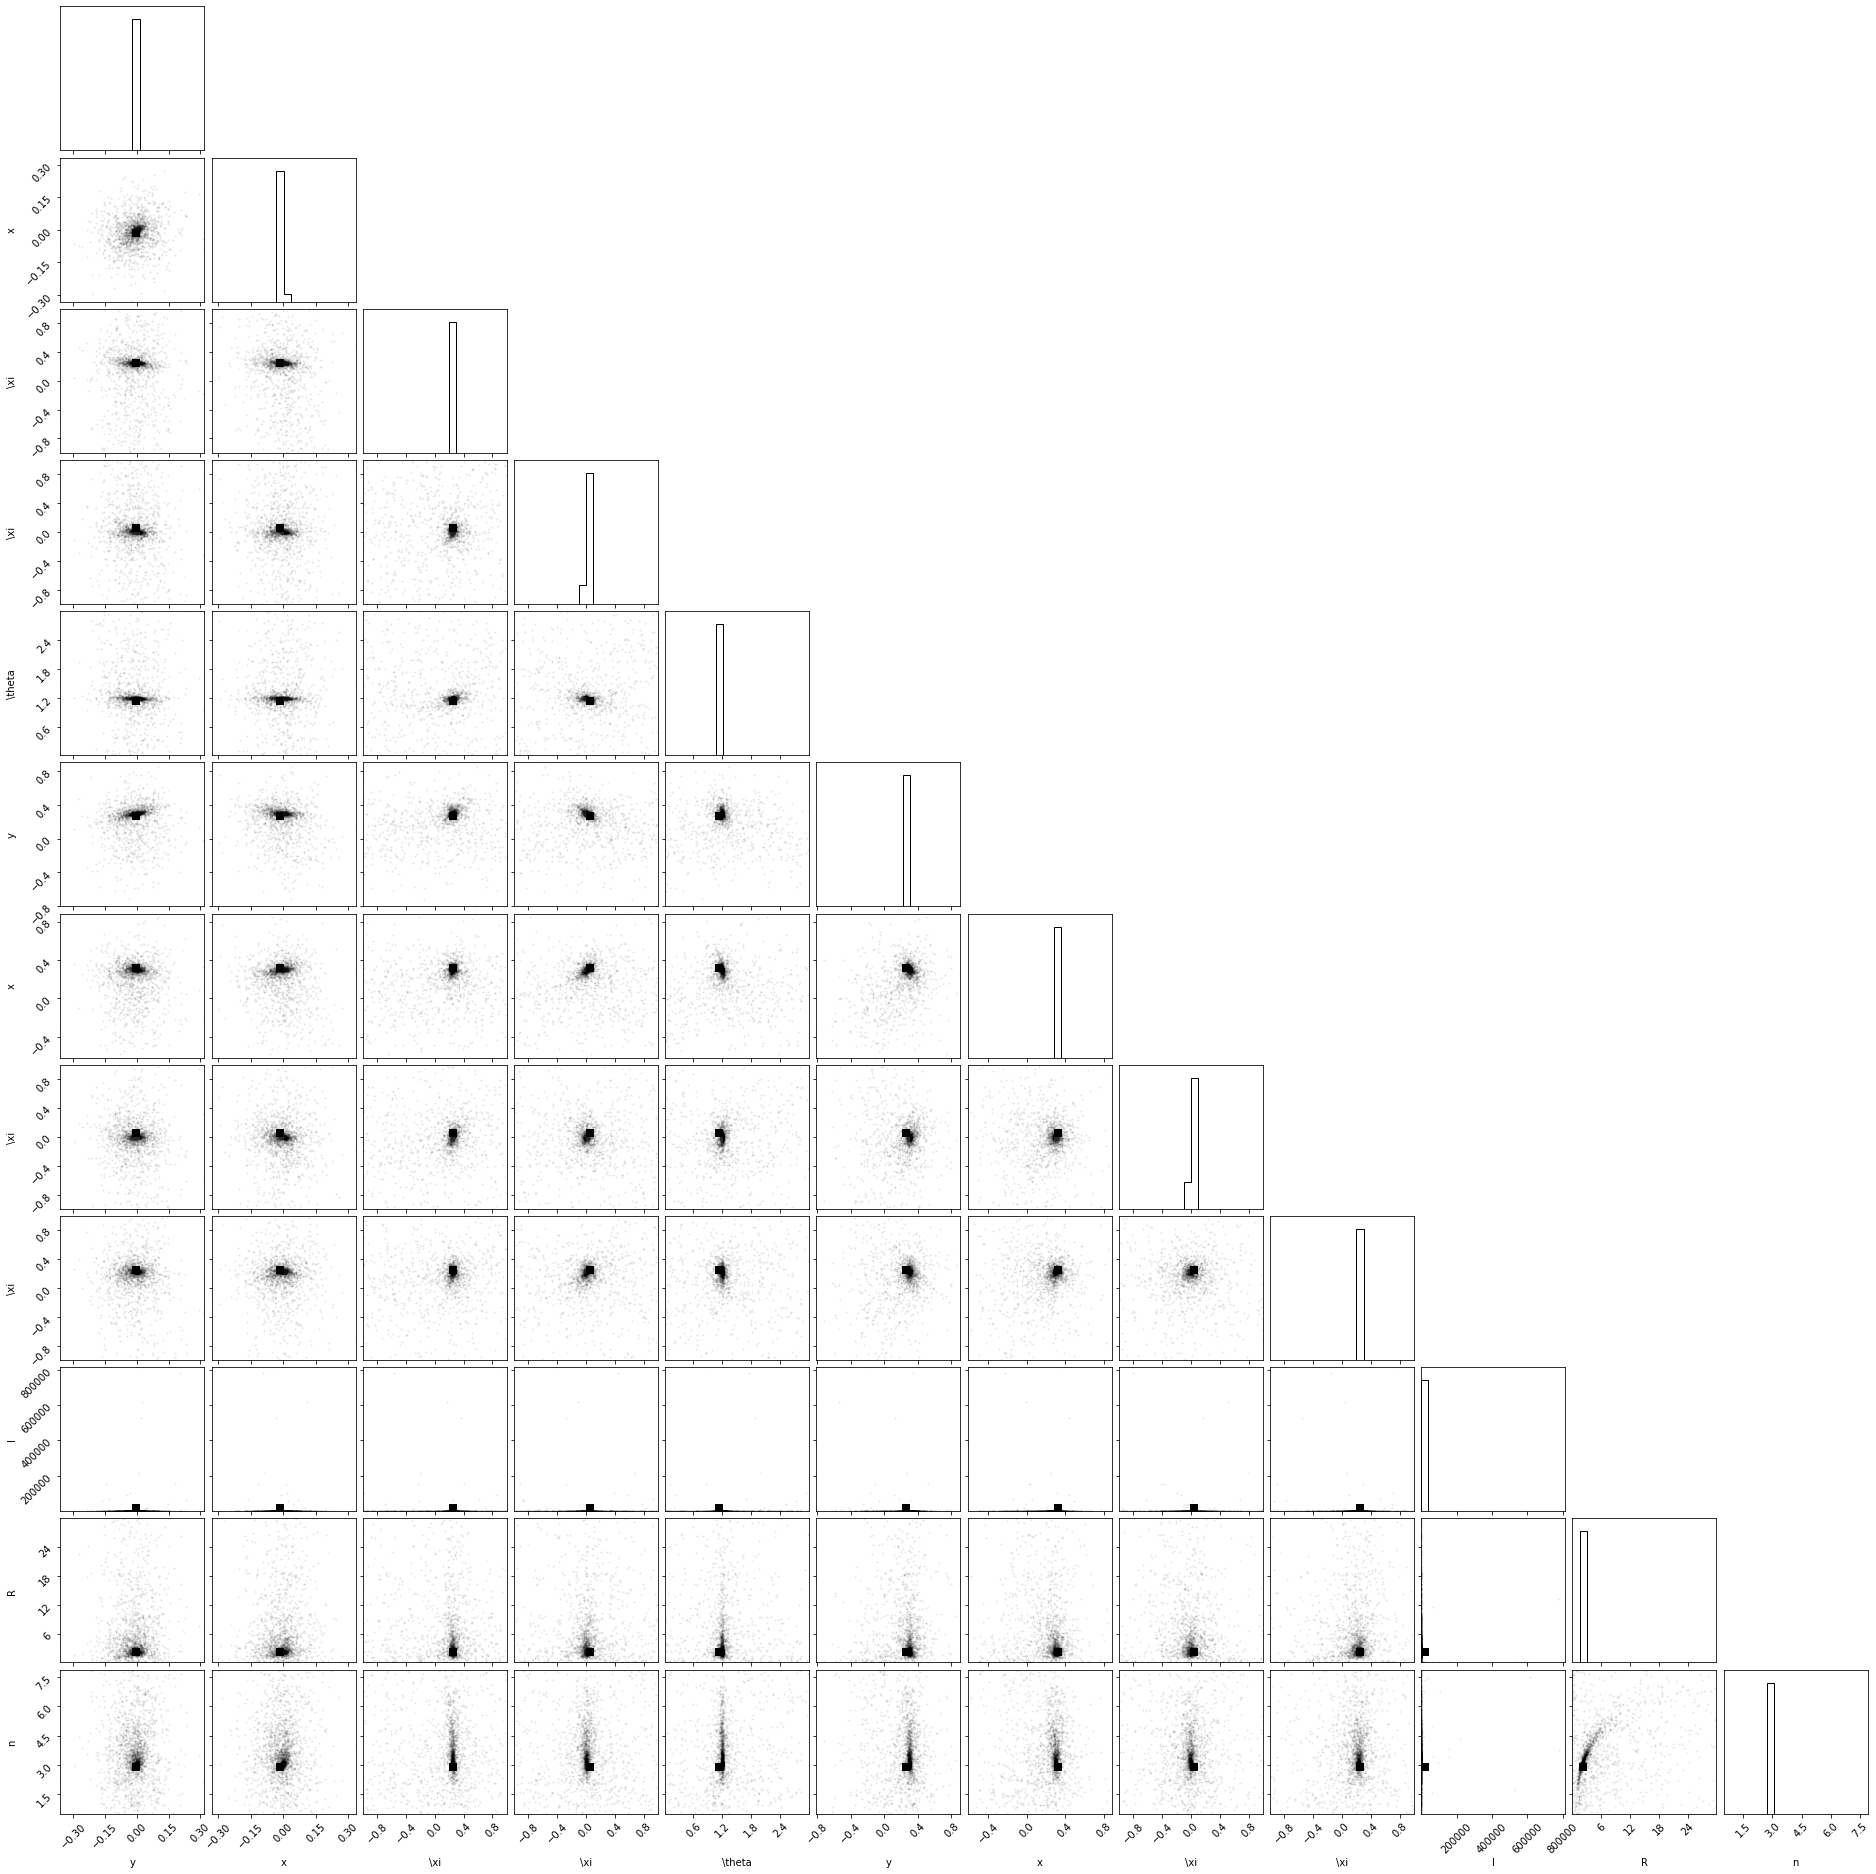

In [18]:
import corner

for samples in agg.values("samples"):

    corner.corner(
        xs=samples.parameters,
        weights=samples.weights,
        labels=samples.model.parameter_labels,
    )

Finished.